## Problem Statement



The dataset contains the temperature, humidity, pressure, and so on recorded from different rooms. The data is collected from the sensors that are implanted in different houses. The house temperature and humidity were monitored using a wireless sensor network. We aim is predict the energy used by the appliances in Wh.

## About the dataset (Appliances Energy Prediction data)

**Appliances**: Energy use in Wh (Target Variable)<br>
**lights**: Energy use of light fixtures in the house in Wh<br>
**T1**: Temperature in the kitchen area in Celsius<br>
**RH_1**: Humidity in the kitchen area in %<br>
**T2**: Temperature in the living room area in Celsius<br>
**RH_2**: Humidity in the living room area in %<br>
**T3**: Temperature in the laundry room area<br>
**RH_3**: Humidity in the laundry room area in %<br>
**T4**: Temperature in the office room in Celsius<br>
**RH_4**: Humidity in the office room in %<br>
**T5**: Temperature in the bathroom in Celsius<br>
**RH_5**: Humidity in the bathroom in %<br>
**T6**: Temperature outside the building (north side) in Celsius<br>
**RH_6**: Humidity outside the building (north side) in %<br>
**T7**: Temperature in ironing room  in Celsius<br>
**RH_7**: Humidity in ironing room in %<br>
**T8**: Temperature in teenager room 2 in Celsius<br>
**RH_8**: Humidity in teenager room 2 in %<br>
**T9**: Temperature in parents room in Celsius<br>
**RH_9**: Humidity in parents room in %<br>
**T_out**: Temperature outside the building in Celsius<br>
**Pres_mm_hg**:  Pressure in mm Hg<br>
**RH_out**: Humidity outside the building in %<br>
**Windspeed**:  Speed of the wind in m/s<br>
**Visibility**:  Visibility of the building from the nearest weather station in km

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Outlier Analysis and Treatment](#outliers)**
    - 2.2 - **[Missing Value Analysis and Treatment](#null)**
    - 2.3 - **[Remove Variables with Low Standard Deviation](#std)**
3. **[What is Transformation?](#def)**
	- 3.1 - **[Types of Transformations](#types)**
       - 3.1.1 - **[Square Root Transformation](#sqr)**
       - 3.1.2 - **[Reciprocal Transformation](#rec)**
       - 3.1.3 - **[Log Transformation](#log)**
       - 3.1.4 - **[Box-Cox Transformation](#box)**
    - 3.2 - **[Model Performance after Transformation](#after)**
4. **[Stepwise Regression](#step)**
    - 4.1 - **[Forward Selection](#for)**
    - 4.2 - **[Backward Elimination](#back)**
5. **[Recursive Feature Elimination (RFE)](#rfe)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [ ]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id="prep"></a>
# 2. Data Preparation

#### Read the dataset and print the first five observations.

In [ ]:
# load the csv file
# store the data in 'df_energy'
df_energy = pd.read_csv('energy_data.csv')

# display first five observations using head()
df_energy.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
0,60,20,20.700000,44.700000,19.500000,45.590000,21.390000,41.950000,20.566667,45.626667,18.060000,52.900000,11.300000,88.590000,18.100000,43.290000,20.500000,52.790000,18.306667,47.590000,11.016667,756.533333,88.333333,8.833333,38.166667
1,60,0,21.290000,37.863333,19.390000,39.663333,21.790000,36.700000,20.463333,37.526667,19.390000,43.200000,9.690000,30.333333,19.267500,32.095000,22.000000,39.223333,19.600000,38.826667,8.350000,761.800000,70.000000,3.500000,40.000000
2,80,0,21.390000,35.790000,19.290000,37.700000,22.760000,34.290000,21.323333,34.730000,18.426667,43.826667,9.845000,24.750000,19.200000,29.200000,22.390000,37.290000,19.463333,35.500000,6.866667,762.333333,69.666667,3.000000,35.666667
3,40,0,19.033333,41.826667,18.533333,41.290000,18.100000,43.790000,15.890000,47.530000,15.390000,51.030000,5.500000,99.900000,15.561111,40.138889,19.594444,51.062778,15.100000,46.760000,5.133333,769.583333,92.000000,4.833333,23.166667
4,60,30,21.700000,46.633333,20.700000,45.900000,22.323333,44.790000,21.000000,47.966667,19.600000,56.540556,8.800000,99.900000,18.760000,45.200000,20.469444,53.189444,18.290000,51.863333,8.633333,757.566667,95.666667,6.000000,55.333333


**Let us now see the number of variables and observations in the data.**

In [ ]:
# use 'shape' to check the dimension of data
df_energy.shape

(1000, 25)

**Interpretation:** The data has 1000 observations and 25 variables.

**Get a concise summary of the DataFrame.**

In [ ]:
# use 'info()' to understand the dataset
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
Appliances     1000 non-null int64
lights         1000 non-null int64
T1             1000 non-null float64
RH_1           1000 non-null float64
T2             1000 non-null float64
RH_2           1000 non-null float64
T3             1000 non-null float64
RH_3           1000 non-null float64
T4             1000 non-null float64
RH_4           1000 non-null float64
T5             1000 non-null float64
RH_5           1000 non-null float64
T6             1000 non-null float64
RH_6           1000 non-null float64
T7             1000 non-null float64
RH_7           1000 non-null float64
T8             1000 non-null float64
RH_8           1000 non-null float64
T9             1000 non-null float64
RH_9           1000 non-null float64
T_out          1000 non-null float64
Press_mm_hg    1000 non-null float64
RH_out         1000 non-null float64
Windspeed      1000 non-null float64
Visibility

**Interpretation:** All the variables are numeric. There are no missing values.

<a id="outliers"></a>
## 2.1 Outlier Analysis and Treatment

**Check the outliers in all the variables and treat them using appropriate techniques.**

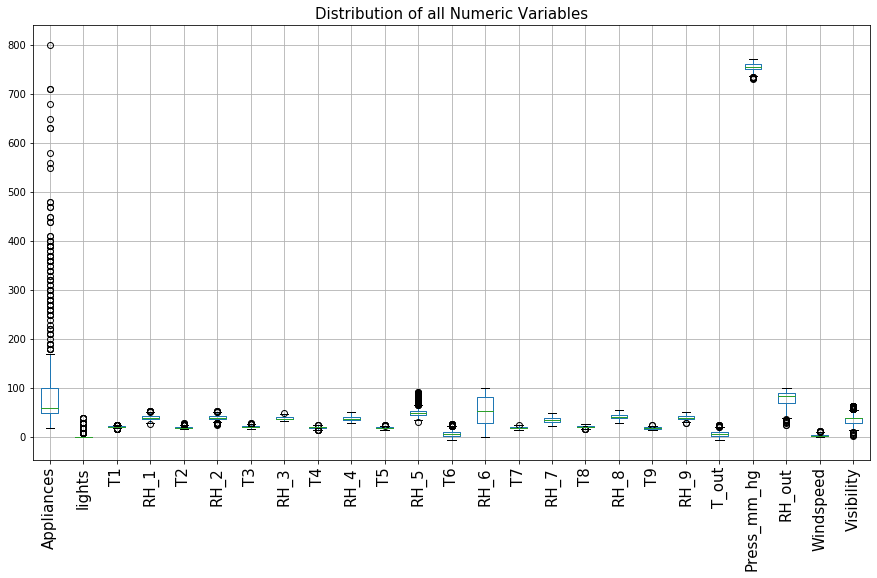

In [ ]:
# plot a boxplot to visualize the outliers in all the numeric variables
df_energy.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
# set text size using 'fontsize'
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Notice that the variable 'Appliances' has a quite large range as compared to the other variables. Also the values of the variable 'Press_mm_hg' are in the range between 700 and 800. Thus, it is difficult to see the outliers with such variables. So, we plot the boxplots of independent variables again by not considering the variables 'Appliances' and 'Press_mm_hg'**

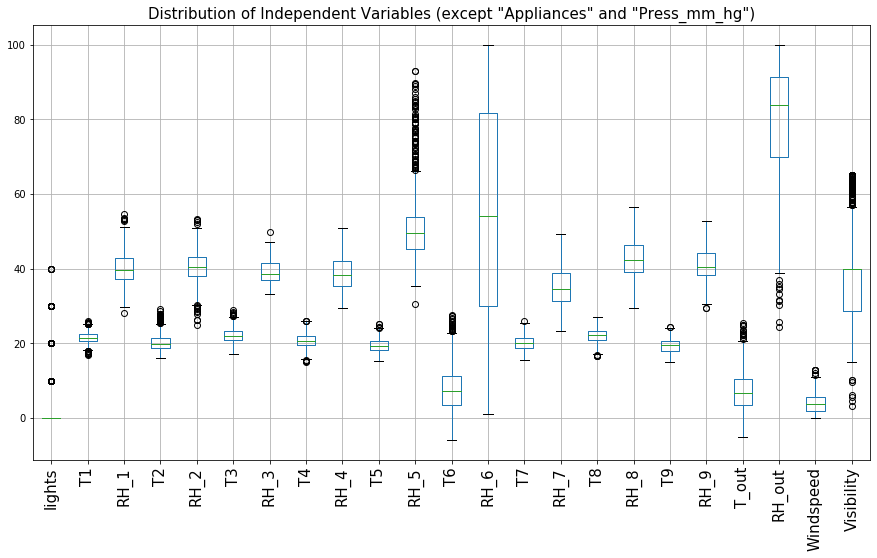

In [ ]:
# plot boxplots of all the numeric variables except 'Appliances' and 'Press_mm_hg'
# use 'iloc[]' to select the variables except 'Appliances' and 'Press_mm_hg'
df_energy.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24]].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables (except "Appliances" and "Press_mm_hg")', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Plot the boxplot of an independent variable 'Press_mm_hg'.**

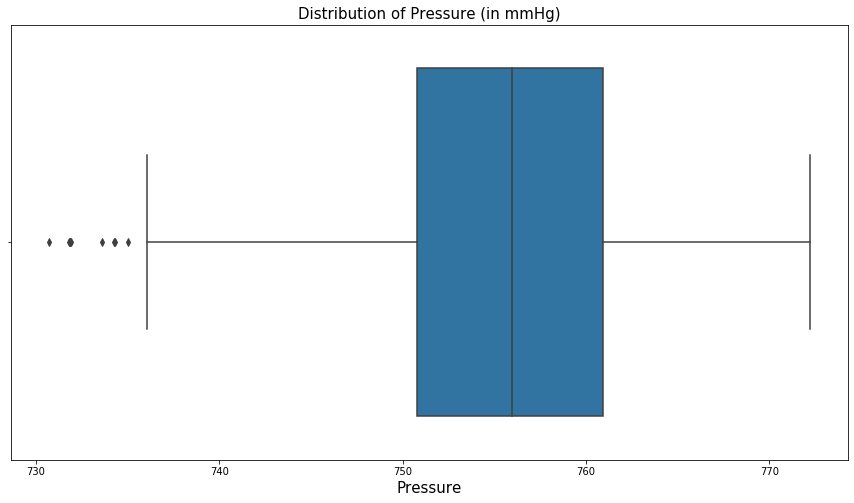

In [ ]:
# plot boxplot for 'Press_mm_hg' using seaborn library
sns.boxplot(df_energy['Press_mm_hg'])

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Pressure (in mmHg)', fontsize = 15)
plt.xlabel('Pressure', fontsize = 15)

# display the plot
plt.show()

**Plot the boxplot of the target (dependent) variable 'Appliances'.**

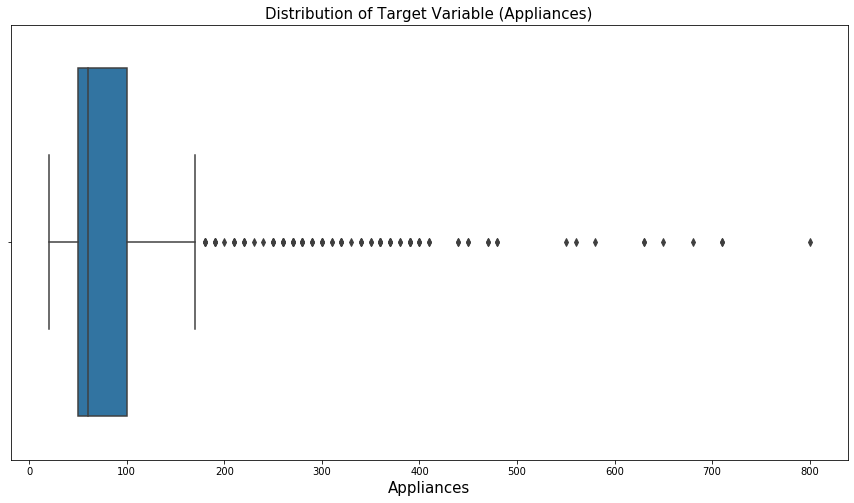

In [ ]:
# plot boxplot for 'Appliances' using seaborn library
sns.boxplot(df_energy['Appliances'])

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Appliances)', fontsize = 15)
plt.xlabel('Appliances', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** From the above plots, we notice that all the variables have points above the upper extreme or below the lower extreme - these points are outliers in the data. However, the exact location of these points is not precisely seen.

Let us use the IQR method to remove the outliers.

In [ ]:
# calculate the first quartile
Q1 = df_energy.quantile(0.25)

# calculate the third quartile
Q3 = df_energy.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (the rows represent outliers in the data)
df_energy = df_energy[~((df_energy < (Q1 - 1.5 * IQR)) | (df_energy > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
df_energy.shape

(543, 25)

**Interpretation:** A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. From the above output, we can see that the dimensions are reduced that implies outliers are removed.

<a id="null"></a>
## 2.2  Missing Value Analysis and Treatment

**Check the presence of missing values in the data and treat them.**

In [ ]:
# sorting the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_energy.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_energy.isnull().sum()*100/df_energy.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Visibility,0,0.000000
RH_5,0,0.000000
lights,0,0.000000
T1,0,0.000000
RH_1,0,0.000000
T2,0,0.000000
RH_2,0,0.000000
T3,0,0.000000
RH_3,0,0.000000
T4,0,0.000000


**Interpretation:** The above output shows that there are no missing values in the data.

<a id="std"></a>
## 2.3 Remove Variables with Low Standard Deviation

#### Check the standard deviation of all the variables

In [ ]:
# std() returns the standard deviation of each variable 
df_energy.std()

Appliances    25.658997
lights         0.000000
T1             1.418813
RH_1           3.579217
T2             1.821311
RH_2           3.803841
T3             1.784325
RH_3           2.978032
T4             1.810984
RH_4           4.079861
T5             1.666814
RH_5           5.473533
T6             5.325781
RH_6          29.376223
T7             1.898608
RH_7           4.663495
T8             1.832304
RH_8           4.976368
T9             1.813200
RH_9           3.973931
T_out          4.615927
Press_mm_hg    6.922218
RH_out        13.365639
Windspeed      2.279804
Visibility     8.582396
dtype: float64

**Interpretation:** As we can see that the variable 'lights' has a standard deviation of zero and thus, it will not contribute to our model. So, we will drop the column 'lights'. 

In [ ]:
# drop the column 'lights' using drop()
# 'axis = 1' drops the specified column
df_energy = df_energy.drop('lights', axis = 1)

<a id="def"></a>
# 3. What is Transformation?

Transformation is a process that can be used to change the scale of the original data to get more accurate results. 

The transformed data can be used to satisfy the assumptions of linear regression, which were not satisfied earlier with the original data.

<a id="types"></a>
## 3.1 Types of Transformations

#### Split the data into training and test sets.

In [ ]:
# create a copy of our dataframe 'df_energy'
df_energy_cons = df_energy.copy()

# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = df_energy_cons.drop('Appliances', axis = 1)

# dependent variable
y = df_energy_cons['Appliances']

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

Let us learn about the different types of transformations:

<a id="sqr"></a>
### 3.1.1 Square Root Transformation

This transformation is used to reduce the skewness in the data. We can transform the target and/or independent variables by taking its square root. It can be used on the data containing zero values. The bivariate regression model after transforming observed values of target variable is given as:

<p style='text-indent:28em'> <strong> sqrt(y) = β<sub>0</sub> + β<sub>1</sub>x  </strong> </p>

Let us apply square root transformation on y_train. 

In [ ]:
# perform the square root transformation on y_train and display the top 5 observations
np.sqrt(y_train).head()

559    7.071068
488   10.000000
791    7.071068
862    5.477226
583    7.745967
Name: Appliances, dtype: float64

<a id="rec"></a>
### 3.1.2 Reciprocal Transformation

Transform the target and/or independent variables by taking its reciprocal. This transformation changes the distribution of the variable drastically. We can not perform the transformation on the data containing zero values. The bivariate regression model after transforming observed values of target variable is given as:

<p style='text-indent:28em'> <strong> 1/y = β<sub>0</sub> + β<sub>1</sub>x  </strong> </p>

Let us apply reciprocal transformation on y_train. 

In [ ]:
# perform the reciprocal transformation on y_train and display the top 5 observations
(1 / y_train).head()

559   0.020000
488   0.010000
791   0.020000
862   0.033333
583   0.016667
Name: Appliances, dtype: float64

<a id="log"></a>
### 3.1.3 Log Transformation

Transform the target and/or independent variables by applying a log on the original data to reduce the skewness. We can not apply log transformation on the data containing zero values. The bivariate regression model after transforming observed values of target variable is given as:
<p style='text-indent:28em'> <strong> log(y) = β<sub>0</sub> + β<sub>1</sub>x  </strong> </p>

In [ ]:
# perform the log transformation on y_train and display the top 5 observations
np.log(y_train).head()

559   3.912023
488   4.605170
791   3.912023
862   3.401197
583   4.094345
Name: Appliances, dtype: float64

<a id="box"></a>
### 3.1.4 Box-Cox Transformation

It is a generalized version of log transformation.
It makes the variable more symmetrical by reducing its skewness. The transformation is given as:<br>

<p style='text-indent:30em'> <strong> y<sup>'</sup><sub>λ</sub> = (y<sup>λ</sup> -1) / λ   </strong> </p>

λ > 1, reduces the negative skewness in the variable and makes it more symmetrical<br>
λ < 1, reduces the positive skewness in the variable and makes it more symmetrical<br>
λ = 1, shifts the variable to the left by 1

The bivariate regression model after transforming observed values of target variable is given as:

<p style='text-indent:30em'> <strong> y<sup>λ</sup> = β<sub>0</sub> + β<sub>1</sub>x  </strong> </p>

In [ ]:
# perform the box-cox transformation on y_train and display the top 5 observations
# '[0]' returns the transformed values of y_train
# use '[0:5]' to print the first five transformed values
stats.boxcox(y_train)[0][0:5]

array([3.40643809, 3.91560106, 3.40643809, 3.01449127, 3.54285384])

<a id="after"></a>
## 3.2 Model Performance after Transformation

#### First, we build the model using the original data.

In [ ]:
# create a copy of our dataframe 'df_energy'
df_energy_cons = df_energy.copy()

#### Split the data into training and test sets.

In [ ]:
# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = df_energy_cons.drop('Appliances', axis = 1)

# dependent variable
y = df_energy_cons['Appliances']

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

# check the dimensions of the train & test subset
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (434, 24)
y_train (434,)
X_test (109, 24)
y_test (109,)


**Build the multiple linear regression model using the OLS method.**

In [ ]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:             Appliances   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     9.663
Date:                Mon, 24 Aug 2020   Prob (F-statistic):           1.09e-26
Time:                        09:10:18   Log-Likelihood:                -1942.0
No. Observations:                 434   AIC:                             3932.
Df Residuals:                     410   BIC:                             4030.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          30.5038    157.184      0.194      

### Check the Assumption of Autocorrelation

We can check the correlation between the residuals using the `Durbin-Watson` test. The value of the test statistic ranges from 0 to 4. The test statistic value near to 2, represents no autocorrelation. The value of the test statistic between 0 and 2 implies positive autocorrelation and the value between 2 and 4 implies negative autocorrelation.

Print the summary of the model with significant variables to check the autocorrelation.

**Interpretation:** From the above summary, we can observe that the value obtained from the `Durbin-Watson` test statistic is close to 2 (= 1.935). Thus, we conclude that there is no autocorrelation.

### Check the Normality of Residuals

Check the normality of residuals before transforming the target variable

Skewness of the residuals:  1.344515323269443


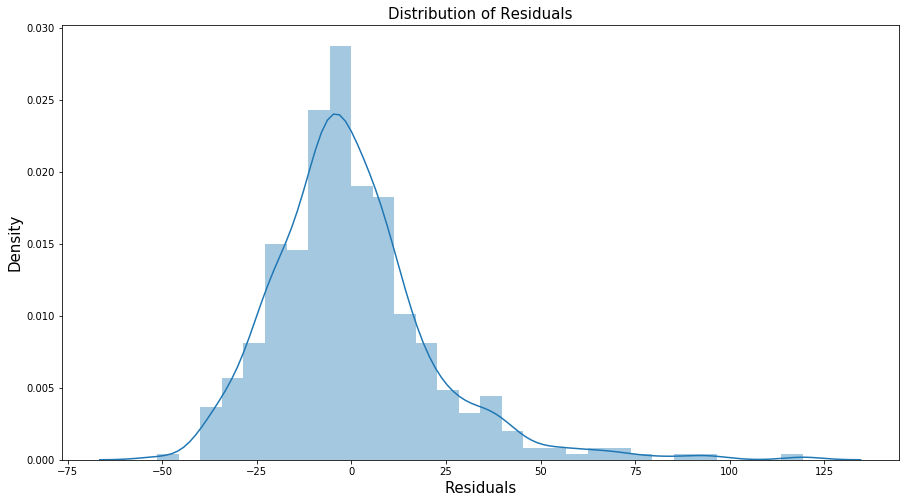

In [ ]:
# plot a distplot for the residuals
sns.distplot(MLR_model.resid)

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# print the skewness of the residuals
print("Skewness of the residuals: ", MLR_model.resid.skew())

We can see that the distribution of the residuals is positively skewed. Thus, we will apply a log transformation to the target variable.

#### Interpretation of coefficient of skewness
If the value of:<br>
skewness < 0 implies negative skewness<br>
skewness > 0 implies positive skewness<br>
skewness = 0 implies no skewness (perfect normal distribution)<br>

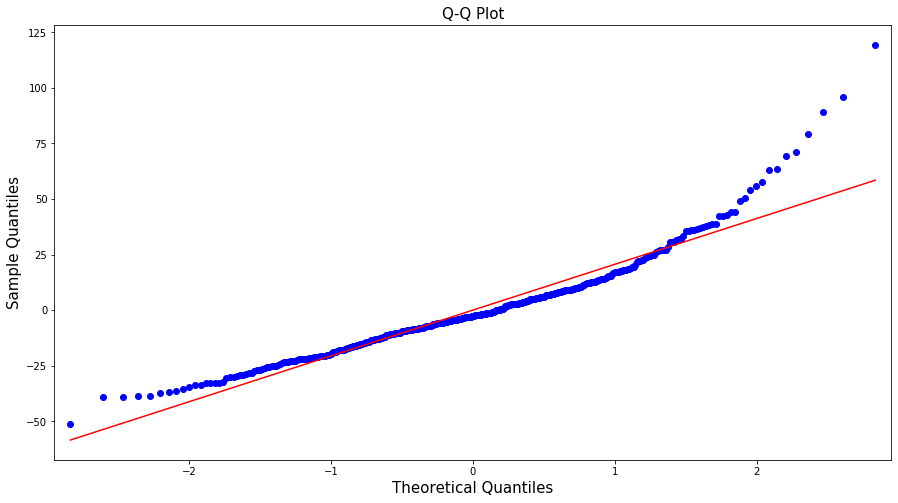

In [ ]:
# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

**Interpretation** Here we can see that the residuals are not normally distributed. The value of skewness is 1.3445. We will log transform the target variable and see if this reduces the skewness.

**Build the multiple linear regression model using the OLS method after transforming the target variable.**

In [ ]:
# build a model on training dataset
# fit() is used to fit the OLS model
# use log transformation of y_train 
MLR_model_after_transform = sm.OLS(np.log(y_train), X_train).fit()

# print the summary output
print(MLR_model_after_transform.summary())

                            OLS Regression Results                            
Dep. Variable:             Appliances   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     9.733
Date:                Mon, 24 Aug 2020   Prob (F-statistic):           6.79e-27
Time:                        09:10:19   Log-Likelihood:                -114.07
No. Observations:                 434   AIC:                             276.1
Df Residuals:                     410   BIC:                             373.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.9872      2.330      1.712      

**Interpretation** The value of R-Squared increases from 0.352 to 0.353 and the value of Adjusted R-Squared increases from 0.315 to 0.317. We don't see much increase in these values but we see that the residuals are more normally distributed. 

Check the normality of residuals after transforming the target variable

Skewness of the residuals:  0.03669648713067125


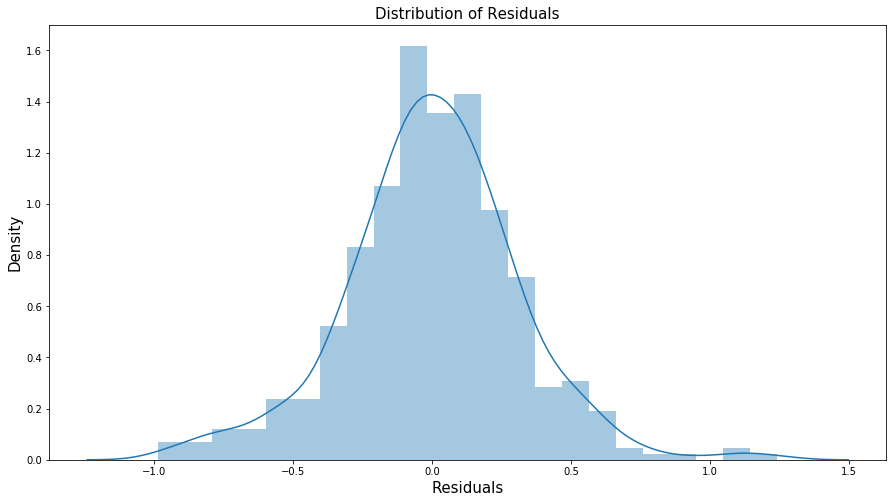

In [ ]:
# plot a distplot for the residuals
sns.distplot(MLR_model_after_transform.resid)

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# print the skewness of the residuals
print("Skewness of the residuals: ", MLR_model_after_transform.resid.skew())

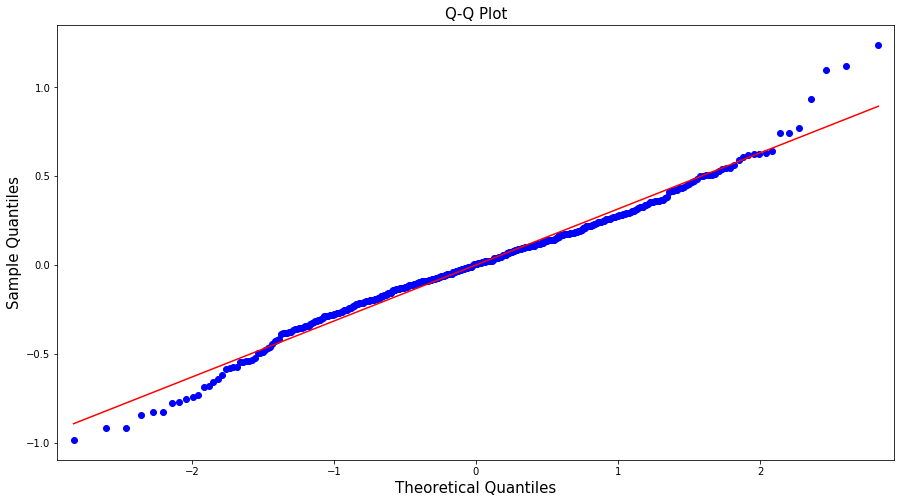

In [ ]:
# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model_after_transform.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

After transforming the target variable, the skewness reduced to 0.0366 and we can see a near normal distribution of the residuals.

<a id="step"></a>
# 4. Stepwise Regression

All the variables in the dataset may not have a significant effect on the target variable. 

Stepwise regression is a process that selects the most important features (independent variables) in the dataset by removing or adding a variable at every step in the regression. In this section we study two approaches to perform stepwise regression:

1. Forward Selection
2. Backward Elimination

<a id="for"></a>
## 4.1 Forward Selection

This method considers the null model (model with no predictors) in the first step. In the next steps start adding one variable at each step until we run out of the independent variables or the stopping rule is achieved. 

The variable is added based on its correlation with the target variable. Such a variable has the least p-value in the model.




In [ ]:
# create a copy of our dataframe 'df_energy'
df_energy_cons = df_energy.copy()

In [ ]:
# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = df_energy_cons.drop('Appliances', axis = 1)

# dependent variable
y = df_energy_cons['Appliances']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [ ]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build forward feature selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. Here '12' is the stopping rule
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator=linreg, k_features = 12, forward=True,
                     verbose=2, scoring='r2')

# fit the forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.1s finished

[2020-08-24 09:10:20] Features: 1/12 -- score: 0.10621363212397117[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished

[2020-08-24 09:10:20] Features: 2/12 -- score: 0.12550776584719064[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.0s finished

[2020-08-24 09:10:20] Features: 3/12 -- score: 0.15432962159763552[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [ ]:
# print the selected feature names when k_features = 12
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('T1', 'RH_1', 'T2', 'RH_2', 'T4', 'T6', 'RH_6', 'T7', 'T8', 'RH_8', 'T9', 'Windspeed')

R-Squared:  0.2633380595751873


### We can pass a range of variables in the k_features i.e. k_features = (5, 15) in the following example.

In [ ]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step forward selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. (5,15) means that all the possible subsets sequentially will be created 
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator = linreg, k_features = (5,15), forward = True,
                     verbose = 2, scoring = 'r2')

# fit the step forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.1s finished

[2020-08-24 09:10:22] Features: 1/15 -- score: 0.10621363212397117[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished

[2020-08-24 09:10:22] Features: 2/15 -- score: 0.12550776584719064[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.0s finished

[2020-08-24 09:10:22] Features: 3/15 -- score: 0.15432962159763552[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [ ]:
# print the selected feature names when k_features = (5, 15)
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('T1', 'RH_1', 'T2', 'RH_2', 'T4', 'T6', 'RH_6', 'T7', 'T8', 'RH_8', 'T9', 'Windspeed')

R-Squared:  0.2633380595751873


### We can also pass a string 'best' in the k_features that will select the best feature set i.e. k_features = 'best' in the following example.

In [ ]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step forward selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. 'best' means that a best possible subset will be selected  
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator = linreg, k_features = 'best', forward = True,
                     verbose = 2, scoring = 'r2')

# fit the step forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.1s finished

[2020-08-24 09:10:24] Features: 1/23 -- score: 0.10621363212397117[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.0s finished

[2020-08-24 09:10:24] Features: 2/23 -- score: 0.12550776584719064[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.0s finished

[2020-08-24 09:10:25] Features: 3/23 -- score: 0.15432962159763552[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [ ]:
# printing the selected feature names when k_features = 'best'
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('T1', 'RH_1', 'T2', 'RH_2', 'T4', 'T6', 'RH_6', 'T7', 'T8', 'RH_8', 'T9', 'Windspeed')

R-Squared:  0.2633380595751873


<a id="back"></a>
## 4.2 Backward Elimination

This method considers the full model (model with all the predictors) in the first step. In the next steps start removing one variable at each step until we run out of the independent variables or the stopping rule is achieved.

The least significant variable (with the highest p-value) is removed at each step.

In [ ]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build backward feature selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'
# 'forward=False' performs backward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_backward = sfs(estimator = linreg, k_features = 12, forward = False,
                     verbose = 2, scoring = 'r2')

# fit the backward elimination on training data using fit()
sfs_backward = linreg_backward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.1s finished

[2020-08-24 09:10:27] Features: 22/12 -- score: 0.24638417047780764[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished

[2020-08-24 09:10:27] Features: 21/12 -- score: 0.25075285783212997[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished

[2020-08-24 09:10:27] Features: 20/12 -- score: 0.2552828817263862[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: D

In [ ]:
# print the selected feature names when k_features = 12
print('Features selelected using backward elimination are: ')
print(sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_backward.k_score_)

Features selelected using backward elimination are: 
('T1', 'RH_1', 'T2', 'RH_2', 'T4', 'T7', 'T8', 'RH_8', 'T9', 'T_out', 'RH_out', 'Windspeed')

R-Squared:  0.2675962366090001


### We can pass a range of variables in the k_features i.e. k_features = (5, 15) in the following example.

In [ ]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step backward feature selection
# pass the regression model to 'estimator'
# pass number of required features to 'k_features'. (5,15) means that all the possible subset combinations will be created 
# 'forward=False' performs backward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_backward = sfs(estimator = linreg, k_features = (5, 15), forward = False,
                     verbose = 2, scoring = 'r2')

# fit the backward elimination on training data using fit()
sfs_backward = linreg_backward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.1s finished

[2020-08-24 09:10:30] Features: 22/5 -- score: 0.24638417047780764[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished

[2020-08-24 09:10:30] Features: 21/5 -- score: 0.25075285783212997[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished

[2020-08-24 09:10:30] Features: 20/5 -- score: 0.2552828817263862[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

In [ ]:
# print the selected feature names when k_features = (5, 15)
print('Features selelected using backward elimination are: ')
print(sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_backward.k_score_)

Features selelected using backward elimination are: 
('T1', 'RH_1', 'T2', 'RH_2', 'T4', 'T7', 'T8', 'RH_8', 'T9', 'T_out', 'RH_out', 'Windspeed')

R-Squared:  0.2675962366090001


### We can also pass a string 'best' in the k_features that will select the best feature set i.e. k_features = 'best' in the following example.

In [ ]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step backward feature selection
# pass the regression model to 'estimator'
# pass number of required features to 'k_features'. 'best' means that a best possible subset will be selected 
# 'forward=False' performs backward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_backward = sfs(estimator = linreg, k_features = 'best', forward = False,
                     verbose = 2, scoring = 'r2')

# fit the backward elimination on training data using fit()
sfs_backward = linreg_backward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.1s finished

[2020-08-24 09:10:32] Features: 22/1 -- score: 0.24638417047780764[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished

[2020-08-24 09:10:33] Features: 21/1 -- score: 0.25075285783212997[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.3s finished

[2020-08-24 09:10:33] Features: 20/1 -- score: 0.2552828817263862[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

In [ ]:
# print the selected feature names when k_features = 'best'
print('Features selelected using backward elimination are: ')
print(sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_backward.k_score_)

Features selelected using backward elimination are: 
('T1', 'RH_1', 'T2', 'RH_2', 'T4', 'T7', 'T8', 'RH_8', 'T9', 'T_out', 'RH_out', 'Windspeed')

R-Squared:  0.2675962366090001


<a id="rfe"></a>
# 5. Recursive Feature Elimination (RFE)

It is the process that returns the significant features in the dataset by recursively removing the less significant feature subsets.

In [ ]:
# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = df_energy_cons.drop('Appliances', axis = 1)
 
# consider the dependent variable
y = df_energy_cons['Appliances']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 12)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'T4', 'RH_4', 'T7', 'T8', 'RH_8',
       'T9', 'Windspeed'],
      dtype='object')


Lets create a linear regression model using the significant variables obtained after RFE.

In [ ]:
# store the X_train with significant variables in new_X_train
new_X_train = X_train[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'T4', 'RH_4', 'T7', 'T8', 'RH_8',
       'T9', 'Windspeed']]

# initiate linear regression
linreg = LinearRegression()

# build the model using new_X_train and y_train
linreg.fit(new_X_train, y_train)

# check the score
linreg.score(new_X_train, y_train)

0.31778476085650187